### Note: I have done the training directly on the all the features and for data representation I have done dimentionality reduction using PCA to represent it in 2 dimentions

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('wine-clustering.csv')

# Data Preprocessing

In [3]:
ds

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
ds.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
ss = StandardScaler()

In [7]:
X = ds.iloc[:,:].values

In [8]:
X = ss.fit_transform(X)

# K-Means

In [9]:
from sklearn.cluster import KMeans

In [10]:
WCSS=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

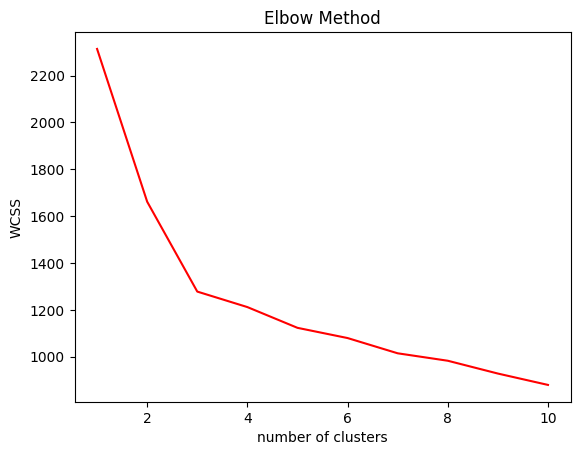

In [11]:
plt.plot(range(1,11),WCSS,color='red')
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [12]:
kmeans = KMeans(n_clusters =3, init = 'k-means++',random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [13]:
YpredKM = kmeans.predict(X)

In [14]:
YpredKM

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

### PCA for dimentionality reduction

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

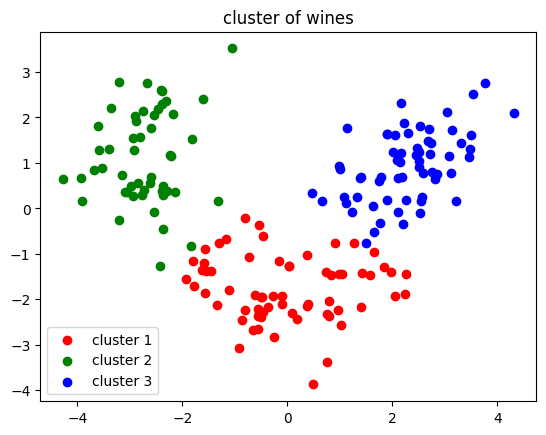

In [16]:
plt.scatter(X_pca[YpredKM==0,0],X_pca[YpredKM==0,1],color = 'red',label='cluster 1')
plt.scatter(X_pca[YpredKM==1,0],X_pca[YpredKM==1,1],color = 'green',label = 'cluster 2')
plt.scatter(X_pca[YpredKM==2,0],X_pca[YpredKM==2,1],color = 'blue',label = 'cluster 3')
plt.title('cluster of wines')
plt.legend()
plt.show()

# Hierarchical(Agglomeritive)

In [17]:
from scipy.cluster import hierarchy as sch  

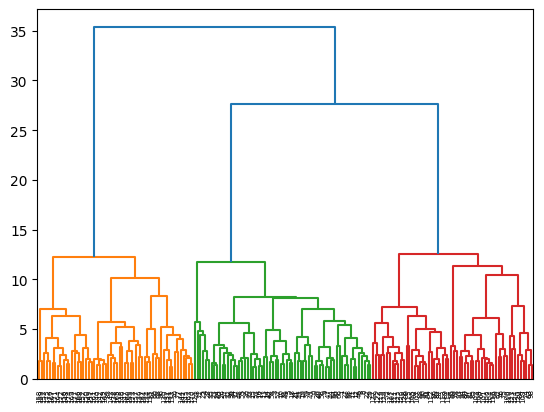

In [18]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
hc = AgglomerativeClustering(n_clusters = 3,linkage='ward')

In [21]:
YpredHC = hc.fit_predict(X)

In [22]:
YpredHC

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

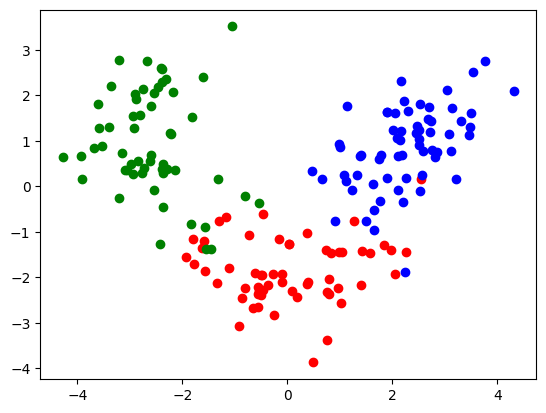

In [27]:
plt.scatter(X_pca[YpredHC==0,0],X_pca[YpredHC==0,1],color='red',label='cluster 1')
plt.scatter(X_pca[YpredHC==1,0],X_pca[YpredHC==1,1],color='green',label='cluster 1')
plt.scatter(X_pca[YpredHC==2,0],X_pca[YpredHC==2,1],color='blue',label='cluster 1')